# Predict number of accidents in the city of Barcelona

# Verify if data meets the requirements of linear regression

- No multicollinearity among the predictors
- Normal distribution of the dependent variable
- Normal distribution of the residuals
- No heteroscedasticity in the observations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="darkgrid")

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [3]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['accidents_2017.csv']))

df = pd.read_csv('D:/Data Sci/Python/python_script/Portfolio Projects/Regression/accidents_2017.csv')

In [4]:
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [5]:
df.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


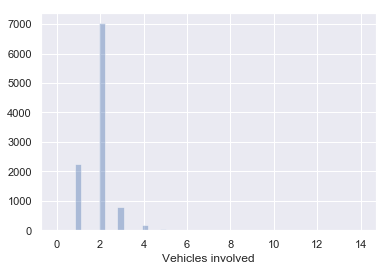

In [6]:
# df = sb.load_dataset('iris')
sb.distplot(df['Vehicles involved'],kde = False)
plt.show()

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


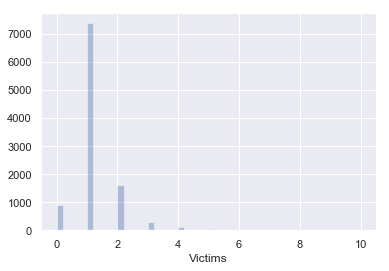

In [7]:
# df = sb.load_dataset('iris')
sb.distplot(df['Victims'],kde = False)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [9]:
# Weekday, Month and 'Part of the day' are oridinal type data, they can be converted to integers

df['Weekday'] = df['Weekday'].astype('category').cat.reorder_categories(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True).cat.codes

df['Month'] = df['Month'].astype('category').cat.reorder_categories(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'], ordered=True).cat.codes

df['Part of the day'] = df['Part of the day'].astype('category').cat.reorder_categories(
    ['Morning', 'Afternoon', 'Night'], ordered=True).cat.codes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null int8
Month                10339 non-null int8
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null int8
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), int8(3), object(4)
memory usage: 999.6+ KB


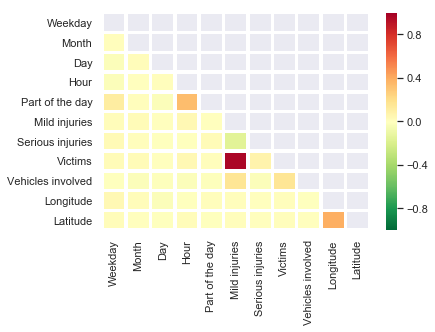

In [11]:
corr_df = df.corr()
# corr_df
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0, mask=mask, linewidth=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [12]:
# According to the heatmap strong postive correlation exist between 'Victims' and 'Mild injuries'. 'Mild injuries will be dropped'

print(df['District Name'].unique().shape)
print(df['Neighborhood Name'].unique().shape)
print(df['Street'].unique().shape)

(11,)
(74,)
(4253,)


In [13]:
# one-hot encoding -- DONT DO THIS 
districts = pd.get_dummies(df['District Name'], prefix='district')
neighbourhoods = pd.get_dummies(df['Neighborhood Name'], prefix='neighbourhood')
streets = pd.get_dummies(df['Street'], prefix='street')
df = df.join([districts, neighbourhoods, streets])
df.shape

(10339, 4353)

In [14]:
#districts
#df.Street
#print(df.Street.iloc[1])
#print(type(df.Street.iloc[2]))


In [15]:
# Add a new column -- Crossing
df['Crossing'] = (df.Street.str.find("/") > -1).astype('int')

In [24]:
#print((df.Street.str.find("/")>-1).head())
#print(type(df.Crossing.iloc[1]))

In [16]:
df.shape

(10339, 4354)

In [17]:
# delete unneeded variables
del df['District Name']
del df['Neighborhood Name']
del df['Street']
del df['Mild injuries']
del df['Id']

In [18]:
df.shape

(10339, 4349)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Columns: 4349 entries, Weekday to Crossing
dtypes: float64(2), int32(1), int64(5), int8(3), uint8(4338)
memory usage: 43.4 MB


In [21]:
#df.isnull()
df.isnull().values.any()

False

In [36]:
#sb.scatterplot(df['Vehicles involved'],df['Victims'])

In [ ]:
# write csv
sb.pairplot(df)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #split data
from sklearn.preprocessing import scale
from sklearn import metrics as sm

# my_X = df.drop(['Vehicles involved'], axis=1)
# my_Y = df['Vehicles involved'].values.reshape(-1,1)
my_X = df[['Month', 'Hour', 'Serious injuries', 'Victims', 'Crossing']]
my_Y = df['Vehicles involved'].values.reshape(-1,1)
cer_s = scale(my_X)
cer_train, cer_test, tar_train, tar_test = train_test_split(cer_s, my_Y,
                                                           test_size = 0.25,
                                                           random_state = 25) #try 15 and check accuracy, 25 is best gives 90%+

linR = LinearRegression(normalize = True).fit(cer_train, tar_train)
# linR = LinearRegression().fit(cer_train, tar_train)
pred = linR.predict(cer_test)
print(linR.score(cer_test, tar_test))
#acc = sm.accuracy_score(tar_test, pred)
#print("****Linear Reg = ", acc)
#print(sm.classification_report(tar_test,pred))

0.02224561632957689


In [150]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as smod
from scipy import stats

# diabetes = datasets.load_diabetes()
X = my_X
y = my_Y

X2 = smod.add_constant(X)
est = smod.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     63.09
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           4.81e-65
Time:                        20:55:55   Log-Likelihood:                -11032.
No. Observations:               10339   AIC:                         2.208e+04
Df Residuals:                   10333   BIC:                         2.212e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.8538      0.025  

/home/samir/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [113]:
# run linear regression



Xs = df.drop(['Vehicles involved'], axis=1)
y = df['Vehicles involved'].values.reshape(-1,1)

ss = StandardScaler()
Xs = ss.fit_transform(Xs)
y = ss.fit_transform(y)


lin_reg = LinearRegression()
print("Hellllllooooooo")
MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

/home/samir/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/samir/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/samir/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/samir/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Hellllllooooooo
-0.9729833739628588


In [114]:
# ridge regularization

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [115]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-0.9729739571029657


In [116]:
# lasso

from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

/home/samir/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/samir/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/samir/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/samir/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You migh

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [117]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
lasso_regressor

{'alpha': 0.01}
-0.9728817658293327


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [129]:
from sklearn import metrics as sm
# lin_reg.get_params()
# lasso_regressor.get_params()

# print(Xs)
y_pred = lasso_regressor.predict(Xs)
print(type(y_pred))
print(type(y_pred[0]))
print(y_pred[:25])
y_pred = np.array(list(map(lambda x: np.round(x), y_pred)))
print(y_pred[:25])
print(type(y))
print(type(y[0]))
print(type(y[0][0]))
print(y.flatten().shape)
print(y_pred.shape)
sm.accuracy_score(y.flatten(), y_pred)
# y_pred.astype('int64')[:5]


<class 'numpy.ndarray'>
<class 'numpy.float64'>
[ 0.21390402  0.12156755  0.77962563  0.04002023  0.01172567 -0.08435243
 -0.09307527  0.1646515   0.00690661 -0.00165462 -0.03724416 -0.02915064
 -0.07246667 -0.1021245  -0.02366226 -0.06618083  0.55063772 -0.03751352
  0.14660478  0.01686741 -0.00465593 -0.20252347 -0.03145595 -0.07748788
  0.03922548]
[ 0.  0.  1.  0.  0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0. -0.  1. -0.
  0.  0. -0. -0. -0. -0.  0.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
(10339,)
(10339,)


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(X train)

In [37]:
from sklearn.preprocessing import StandardScaler
data= [[1, 1, 1, 1, 1],[2, 5, 10, 50, 100],[3, 10, 20, 150, 200],[4, 15, 40, 200, 300]]

df = pd.DataFrame(data, columns=['N0', 'N1', 'N2', 'N3', 'N4']).astype('float64')
print(df)
sc_X = StandardScaler()
print("Hello1")
print(sc_X.fit(df))
df = sc_X.fit_transform(df)
print(df)
print(sc_X.transform(df))

    N0    N1    N2     N3     N4
0  1.0   1.0   1.0    1.0    1.0
1  2.0   5.0  10.0   50.0  100.0
2  3.0  10.0  20.0  150.0  200.0
3  4.0  15.0  40.0  200.0  300.0
Hello1
StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.34164079 -1.28280871 -1.15534415 -1.2604572  -1.33894539]
 [-0.4472136  -0.52262577 -0.53456222 -0.63816599 -0.45080071]
 [ 0.4472136   0.4276029   0.15519548  0.63181608  0.44631513]
 [ 1.34164079  1.37783158  1.53471088  1.26680711  1.34343097]]
[[-3.43606798 -1.71664677 -1.30401067 -1.2891646  -1.35992844]
 [-2.63606798 -1.57217725 -1.26119176 -1.28126162 -1.35196075]
 [-1.83606798 -1.39159034 -1.21361519 -1.26513307 -1.34391258]
 [-1.03606798 -1.21100343 -1.11846205 -1.2570688  -1.33586442]]
